<h1 class='alert alert-warning'>This has a bunch of global paths</h1> 
What I'm doing here is downloading pathway .gpml files from reactome and mapping data on them. I'm keeping it becuase the images are nice, but it introduces a bunch of globals and dependencies. If you are interested in reprocuding this send me an email.  

In [ ]:
cd ..

/cellar/users/agross/anaconda2/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


importing IPython notebook from metaPCNA

importing IPython notebook from Imports

0.921417565485


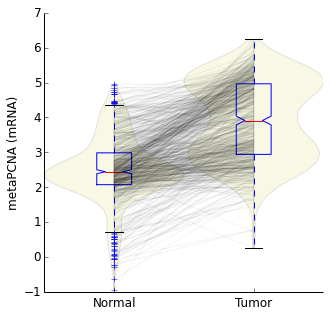

In [2]:
import NotebookImport
from metaPCNA import *

In [ ]:
import pandas as pd
import lxml.etree

from matplotlib.colors import rgb2hex
from matplotlib.cm import RdBu

from IPython.display import SVG, HTML

from wikipathways_api_client import WikipathwaysApiClient

wikipathways_api_client_instance = WikipathwaysApiClient()

In [9]:
def get_gene(c):
    try: 
        a = [b for b in c.getchildren() if 'Value' in b.attrib][0]
        g = a.attrib['Value'].split(' | ')[0]
        if g in rna_df.index:
            return g
        else:
            return c.attrib['TextLabel']
    except:
        return c.attrib['TextLabel']

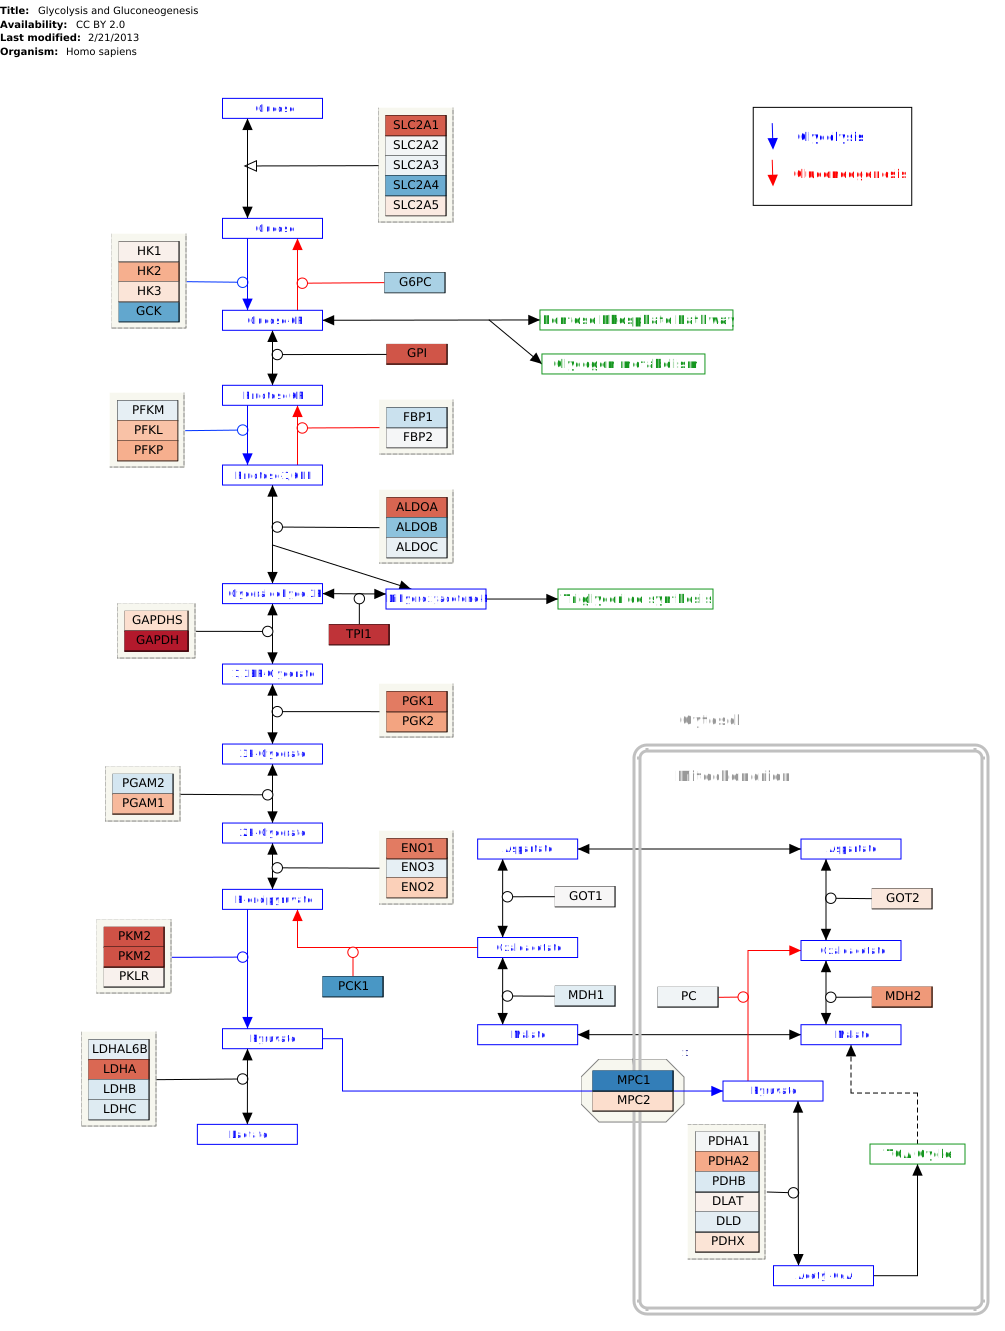

In [10]:
p = '/cellar/users/agross/Downloads_Old/WP534_78585.gpml'
doc = lxml.etree.parse(p)
root = doc.getroot()
#ids = pd.DataFrame([[c.attrib['TextLabel'], c.attrib['GraphId']] for c in root.getchildren() 
#           if 'TextLabel' in c.attrib])
ids = pd.DataFrame([[get_gene(c), c.attrib['GraphId']] for c in root.getchildren() 
           if 'TextLabel' in c.attrib])
ids = ids.set_index(0)[1]
f = dx_rna.frac
f['MPC1'] = f['BRP44L']
f['MPC2'] = f['BRP44']
pp = ids.ix[f.index].dropna()
gm = f.ix[pp.index]
cmap = gm.map(lambda v: rgb2hex(RdBu(1-v)).upper()[1:])

# Get colored pathway
kwargs = {
    'identifier': 'WP534',
    'version': 0,
    'element_identifiers': list(pp),
    'colors': list(cmap),
    'file_format': 'image/svg+xml'
}
file = wikipathways_api_client_instance.get_colored_pathway(**kwargs)
f = open(FIGDIR + 'glyco.svg','wb')
f.write(file)
f.close()
SVG(file)

In [309]:
dx_rna.ix['LDHA']

num_ox    5.38e+02
num_dx    6.84e+02
frac      7.87e-01
p         1.34e-53
Name: LDHA, dtype: float64

In [300]:
dx_rna.ix['BRP44L']

num_ox    1.05e+02
num_dx    6.84e+02
frac      1.54e-01
p         2.96e-80
Name: BRP44L, dtype: float64

In [326]:
f_win.rank(pct=True).ix['ADH1C']

0.0013013067288402103

In [303]:
f_win.rank(pct=True).ix['BRP44L']

0.0055847747112725693

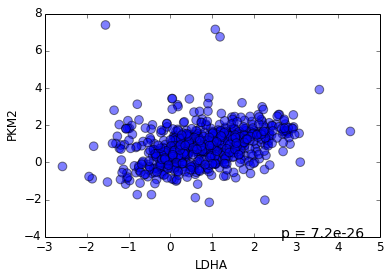

In [308]:
series_scatter(dx.ix['LDHA'], dx.ix['PKM2'])

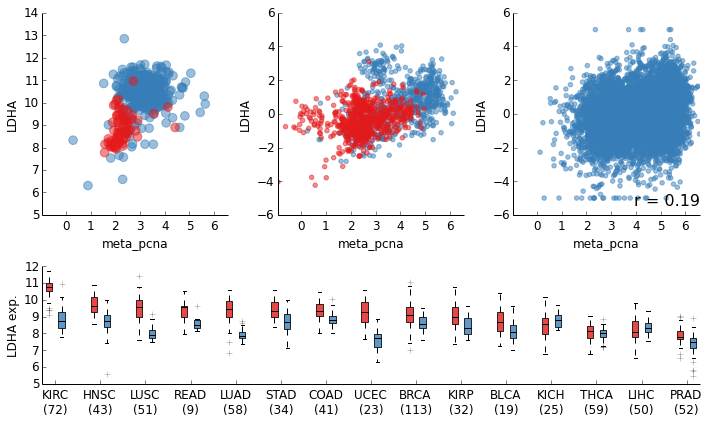

In [310]:
switch_plot('LDHA')

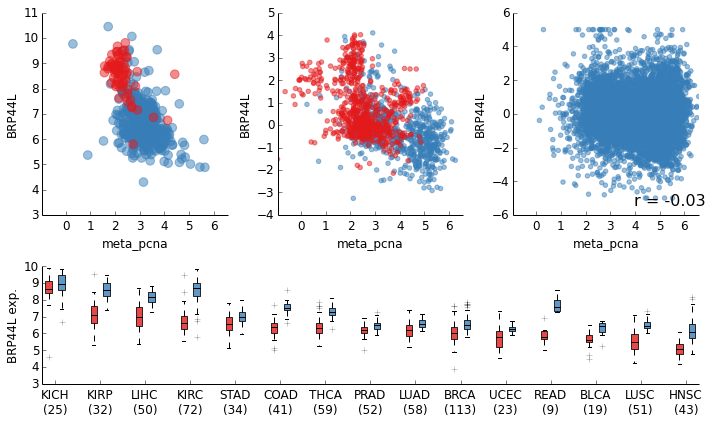

In [262]:
switch_plot('BRP44L')

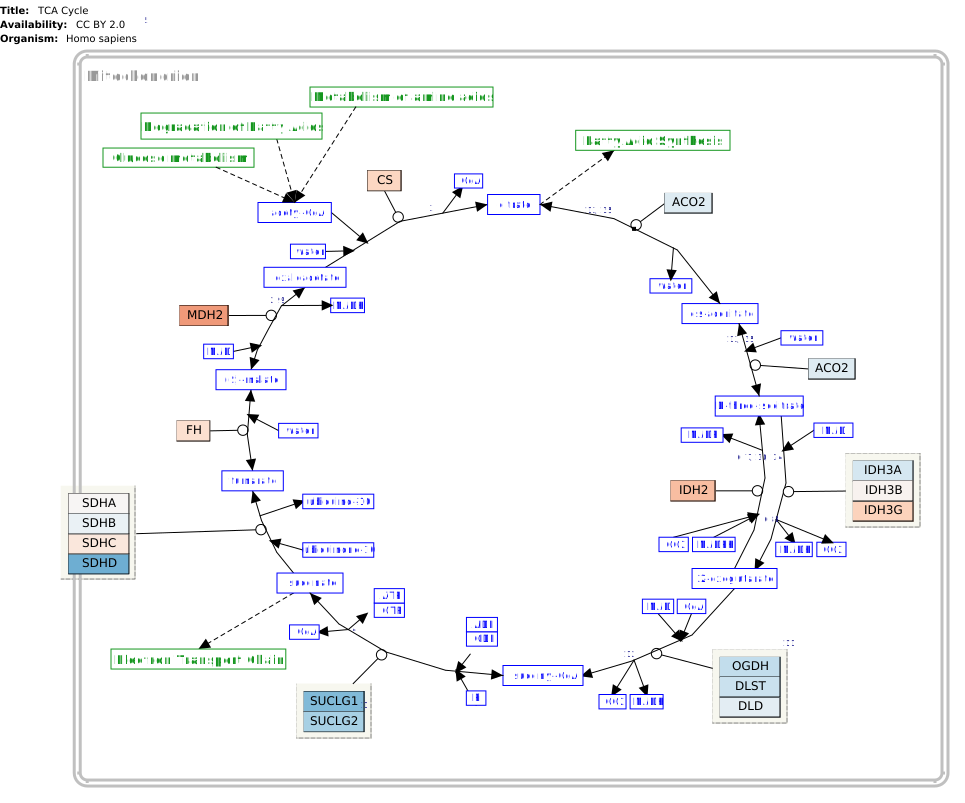

In [236]:
doc = lxml.etree.parse('http://www.wikipathways.org//wpi/wpi.php?action=downloadFile&type=gpml&pwTitle=Pathway:WP78&oldid=70014')
root = doc.getroot()
#ids = pd.DataFrame([[c.attrib['TextLabel'], c.attrib['GraphId']] for c in root.getchildren() 
#           if 'TextLabel' in c.attrib])
ids = pd.DataFrame([[get_gene(c), c.attrib['GraphId']] for c in root.getchildren() 
           if 'TextLabel' in c.attrib])
ids = ids.set_index(0)[1]
f = dx_rna.frac
pp = ids.ix[f.index].dropna()
gm = f.ix[pp.index]
cmap = gm.map(lambda v: rgb2hex(RdBu(1-v)).upper()[1:])

# Get colored pathway
kwargs = {
    'identifier': 'WP78',
    'version': 0,
    'element_identifiers': list(pp),
    'colors': list(cmap),
    'file_format': 'image/svg+xml'
}
file = wikipathways_api_client_instance.get_colored_pathway(**kwargs)
SVG(file)

In [ ]:
f_win.rank(ascending=False).ix['RUNX1']

In [ ]:
switch_plot('RUNX1')

In [ ]:
p = 'http://www.wikipathways.org//wpi/wpi.php?action=downloadFile&type=gpml&pwTitle=Pathway:WP2849&oldid=78586'
doc = lxml.etree.parse(p)
root = doc.getroot()
ids = pd.DataFrame([[c.attrib['TextLabel'], c.attrib['GraphId']] for c in root.getchildren() 
           if 'TextLabel' in c.attrib])
ids = ids.set_index(0)[1]
f = f_win + .5
pp = ids.ix[f.index].dropna()
gm = f.ix[pp.index]
cmap = gm.map(lambda v: rgb2hex(RdBu(1-v)).upper()[1:])

# Get colored pathway
kwargs = {
    'identifier': 'WP2849',
    'version': 0,
    'element_identifiers': list(pp),
    'colors': list(cmap),
    'file_format': 'image/svg+xml'
}
file = wikipathways_api_client_instance.get_colored_pathway(**kwargs)
SVG(file)

In [11]:
corr_profile_t = pd.read_hdf(STORE, 'dfs_correlations')
corr_profile_m = pd.read_hdf(STORE, 'dx_correlations')
corr_change = corr_profile_m - corr_profile_t

In [12]:
from Figures.KEGG import *

In [14]:
pid = 'hsa04640'
mapping = pull_pathway_info_from_kegg(pid)
plot_data_on_pathway(pid, mapping, corr_change.ix['GABRD'] + .5)

http://www.kegg.jp/kegg-bin/show_pathway?map=hsa04640&multi_query=hsa:290+%23FBE4D6%0D%hsa:929+%23F6B394%0D%hsa:930+%23FBE3D4%0D%hsa:913+%23F8BFA4%0D%hsa:914+%23BF3338%0D%hsa:933+%23EC9374%0D%hsa:100133941+%23E9F0F4%0D%hsa:945+%23CE4F45%0D%hsa:947+%23F9C4A9%0D%hsa:948+%23F6AF8E%0D%hsa:951+%23C2383A%0D%hsa:952+%23F9C6AC%0D%hsa:915+%23C94741%0D%hsa:916+%23C84440%0D%hsa:917+%23CE4F45%0D%hsa:920+%23E98B6E%0D%hsa:960+%23DF765E%0D%hsa:921+%23D25849%0D%hsa:1604+%23FCD3BC%0D%hsa:966+%23F09C7B%0D%hsa:924+%23D7634F%0D%hsa:925+%23D55D4C%0D%hsa:926+%23DF765E%0D%hsa:928+%23F0F4F6%0D%hsa:1378+%23FAEAE1%0D%hsa:1380+%23D7E8F1%0D%hsa:1435+%23E8896C%0D%hsa:1436+%23E37E64%0D%hsa:1437+%23F8BB9E%0D%hsa:1438+%23DF765E%0D%hsa:1440+%23FBCCB4%0D%hsa:1441+%23D05548%0D%hsa:1791+%23F7F6F6%0D%hsa:2056+%23FBE5D8%0D%hsa:2057+%23F6F7F7%0D%hsa:2208+%23FAE9DF%0D%hsa:2209+%23C6413E%0D%hsa:2322+%23FBCEB7%0D%hsa:2323+%23EE9677%0D%hsa:2811+%23FAE8DE%0D%hsa:2812+%2367001F%0D%hsa:2814+%23FBE4D6%0D%hsa:2815+%23EB9172%0D%hsa:2

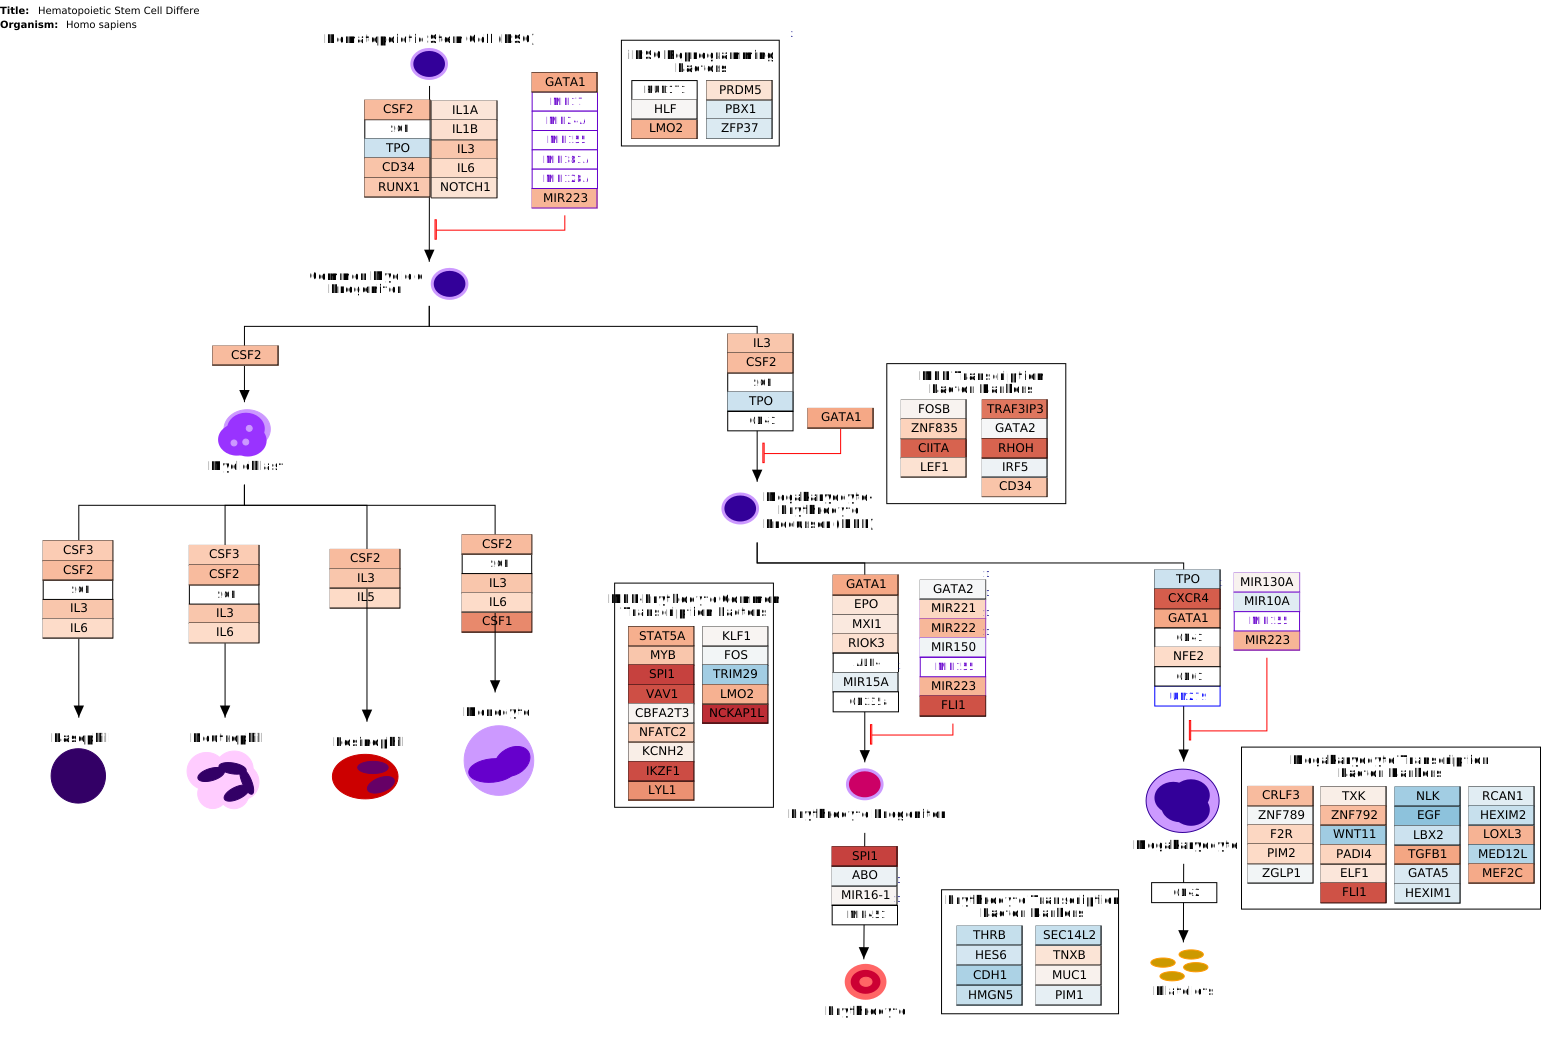

In [228]:
p = 'http://www.wikipathways.org//wpi/wpi.php?action=downloadFile&type=gpml&pwTitle=Pathway:WP2849&oldid=78586'
doc = lxml.etree.parse(p)
root = doc.getroot()
ids = pd.DataFrame([[get_gene(c), c.attrib['GraphId']] for c in root.getchildren() 
           if 'TextLabel' in c.attrib])
ids = ids.set_index(0)[1]
f = corr_change.ix['GABRD'] + .5
pp = ids.ix[f.dropna().index].dropna()
gm = f.ix[pp.index]
cmap = gm.map(lambda v: rgb2hex(RdBu(1-v)).upper()[1:])

# Get colored pathway
kwargs = {
    'identifier': 'WP2849',
    'version': 0,
    'element_identifiers': list(pp),
    'colors': list(cmap),
    'file_format': 'image/svg+xml'
}
file = wikipathways_api_client_instance.get_colored_pathway(**kwargs)
SVG(file)

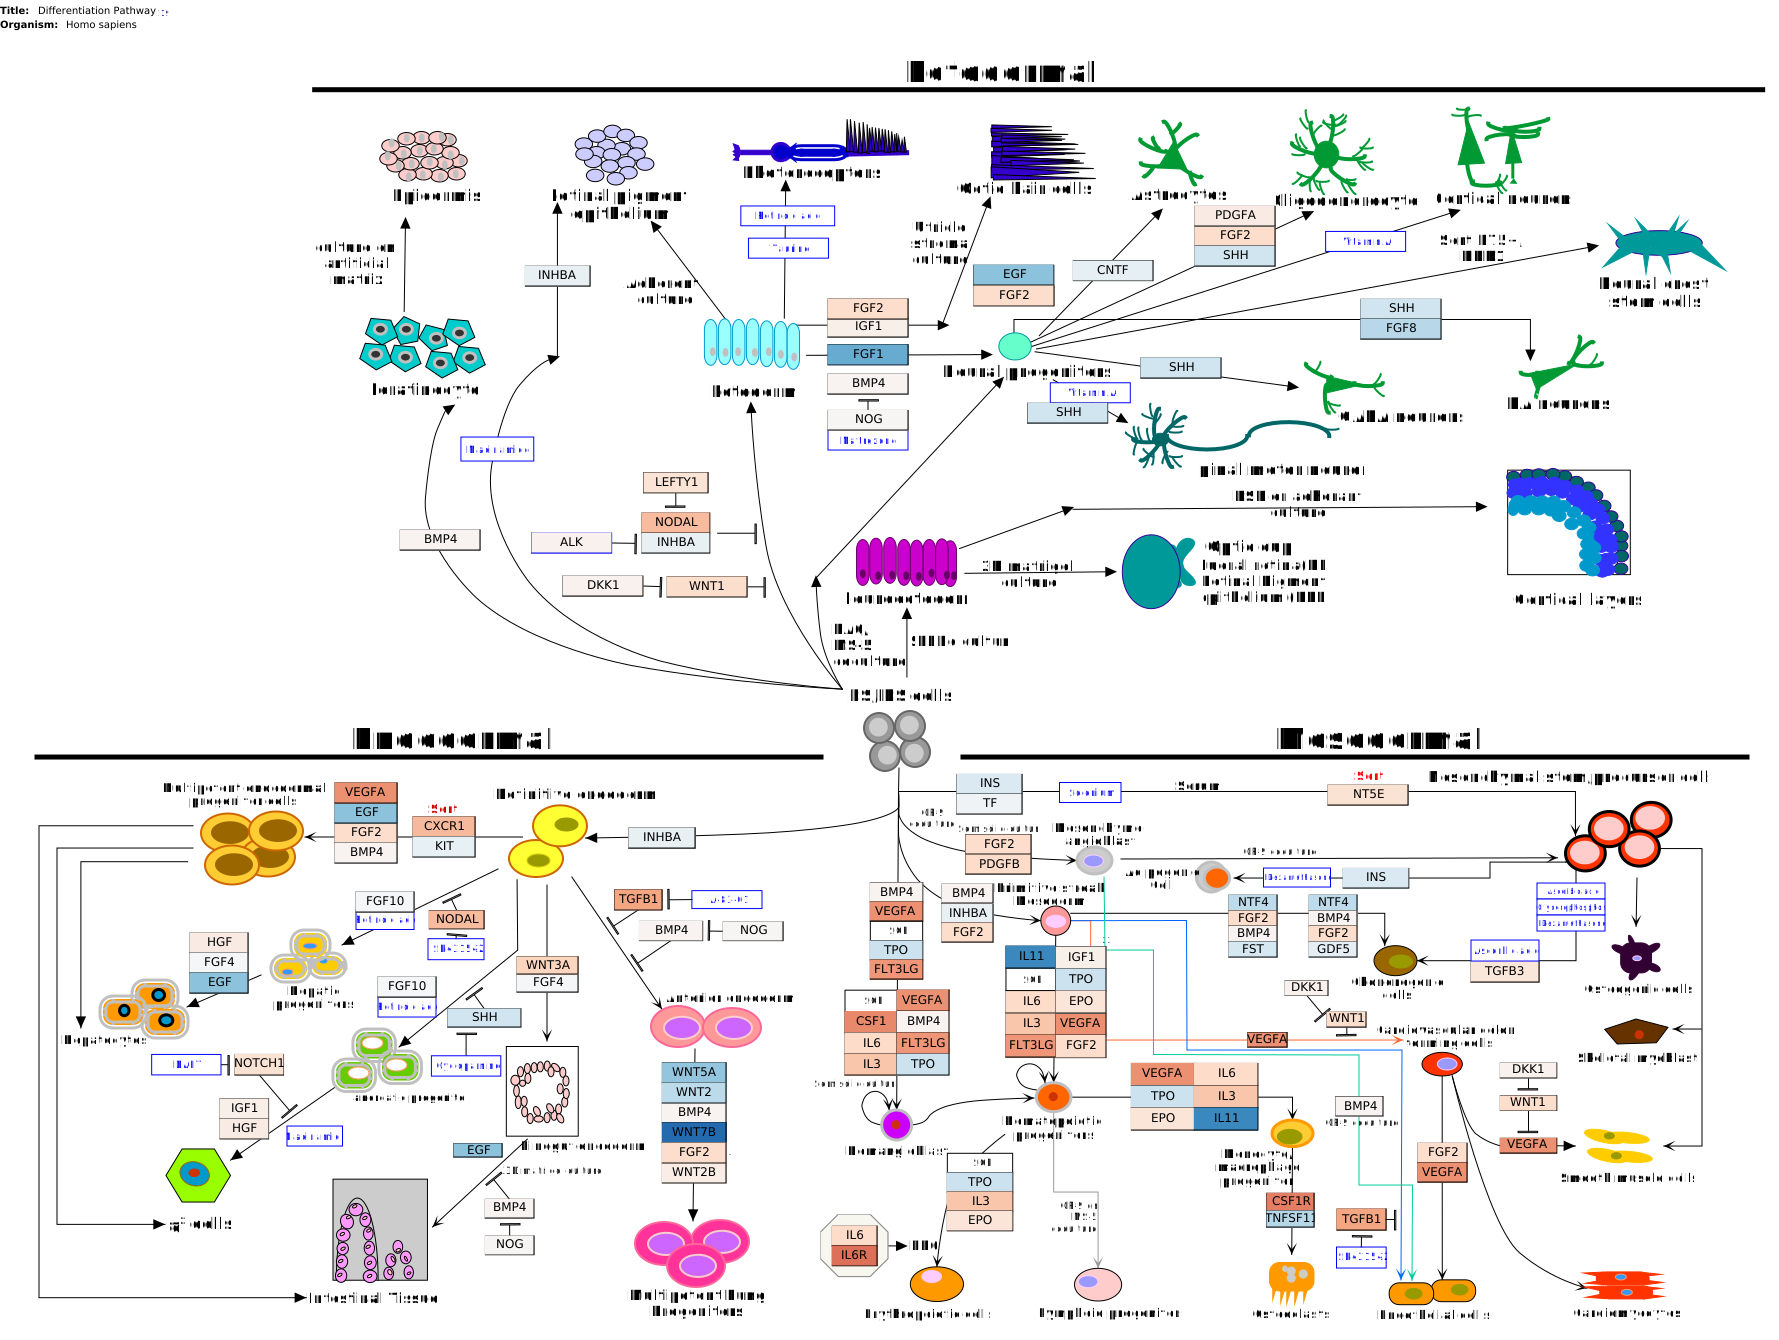

In [234]:
p = 'http://www.wikipathways.org//wpi/wpi.php?action=downloadFile&type=gpml&pwTitle=Pathway:WP2848&oldid=80009'
doc = lxml.etree.parse(p)
root = doc.getroot()
#ids = pd.DataFrame([[c.attrib['TextLabel'], c.attrib['GraphId']] for c in root.getchildren() 
#           if 'TextLabel' in c.attrib])
ids = pd.DataFrame([[get_gene(c), c.attrib['GraphId']] for c in root.getchildren() 
           if 'TextLabel' in c.attrib])
ids = ids.set_index(0)[1]
f = corr_change.ix['GABRD'] + .5
pp = ids.ix[f.index].dropna()
gm = f.ix[pp.index]
cmap = gm.map(lambda v: rgb2hex(RdBu(1-v)).upper()[1:])

# Get colored pathway
kwargs = {
    'identifier': 'WP2848',
    'version': 0,
    'element_identifiers': list(pp),
    'colors': list(cmap),
    'file_format': 'image/svg+xml'
}
file = wikipathways_api_client_instance.get_colored_pathway(**kwargs)
SVG(file)

In [215]:

#ids = pd.DataFrame([[get_gene(c), c.attrib['GraphId']] for c in root.getchildren() 
#           if 'TextLabel' in c.attrib])
#ids = ids.set_index(0)[1]

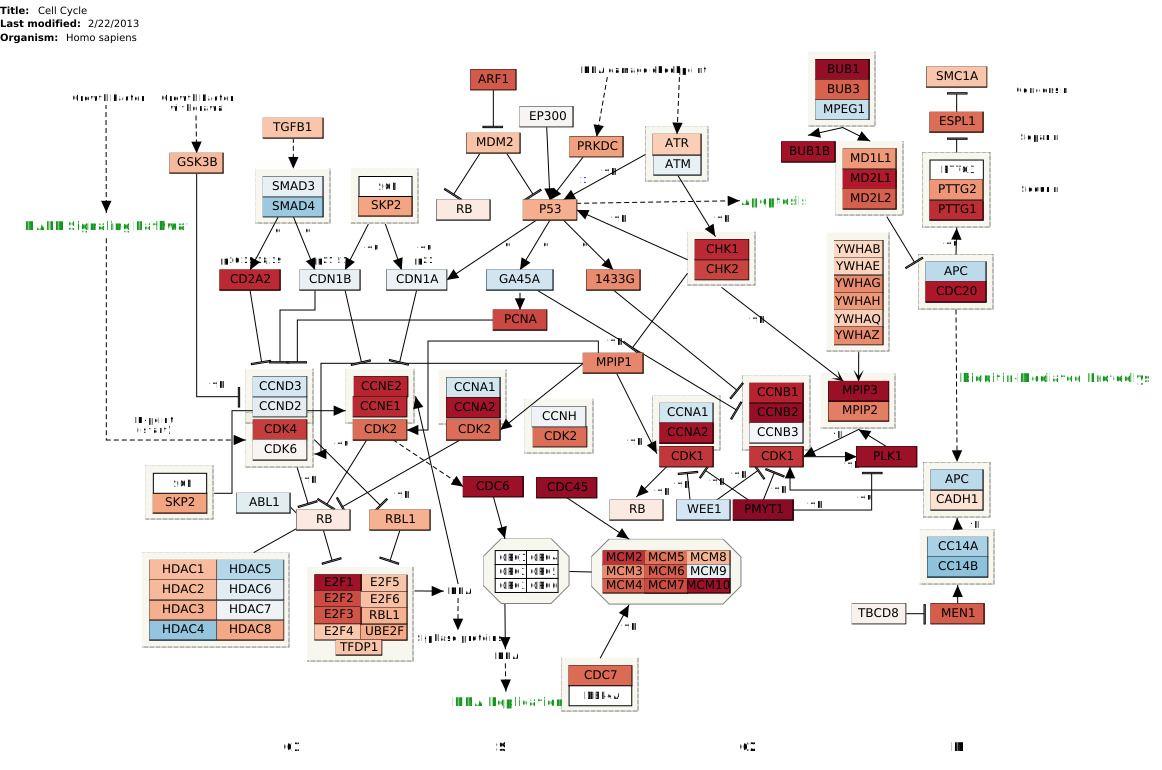

In [216]:
p = 'http://www.wikipathways.org//wpi/wpi.php?action=downloadFile&type=gpml&pwTitle=Pathway:WP179&oldid=70629'
doc = lxml.etree.parse(p)
root = doc.getroot()
#ids = pd.DataFrame([[c.attrib['TextLabel'], c.attrib['GraphId']] for c in root.getchildren() 
#           if 'TextLabel' in c.attrib])
ids = pd.DataFrame([[get_gene(c), c.attrib['GraphId']] for c in root.getchildren() 
           if 'TextLabel' in c.attrib])
ids = ids.set_index(0)[1]
f = dx_rna.frac
pp = ids.ix[f.index].dropna()
gm = f.ix[pp.index]
cmap = gm.map(lambda v: rgb2hex(RdBu(1-v)).upper()[1:])

# Get colored pathway
kwargs = {
    'identifier': 'WP179',
    'version': 0,
    'element_identifiers': list(pp),
    'colors': list(cmap),
    'file_format': 'html'
}
file = wikipathways_api_client_instance.get_colored_pathway(**kwargs)
SVG(file)

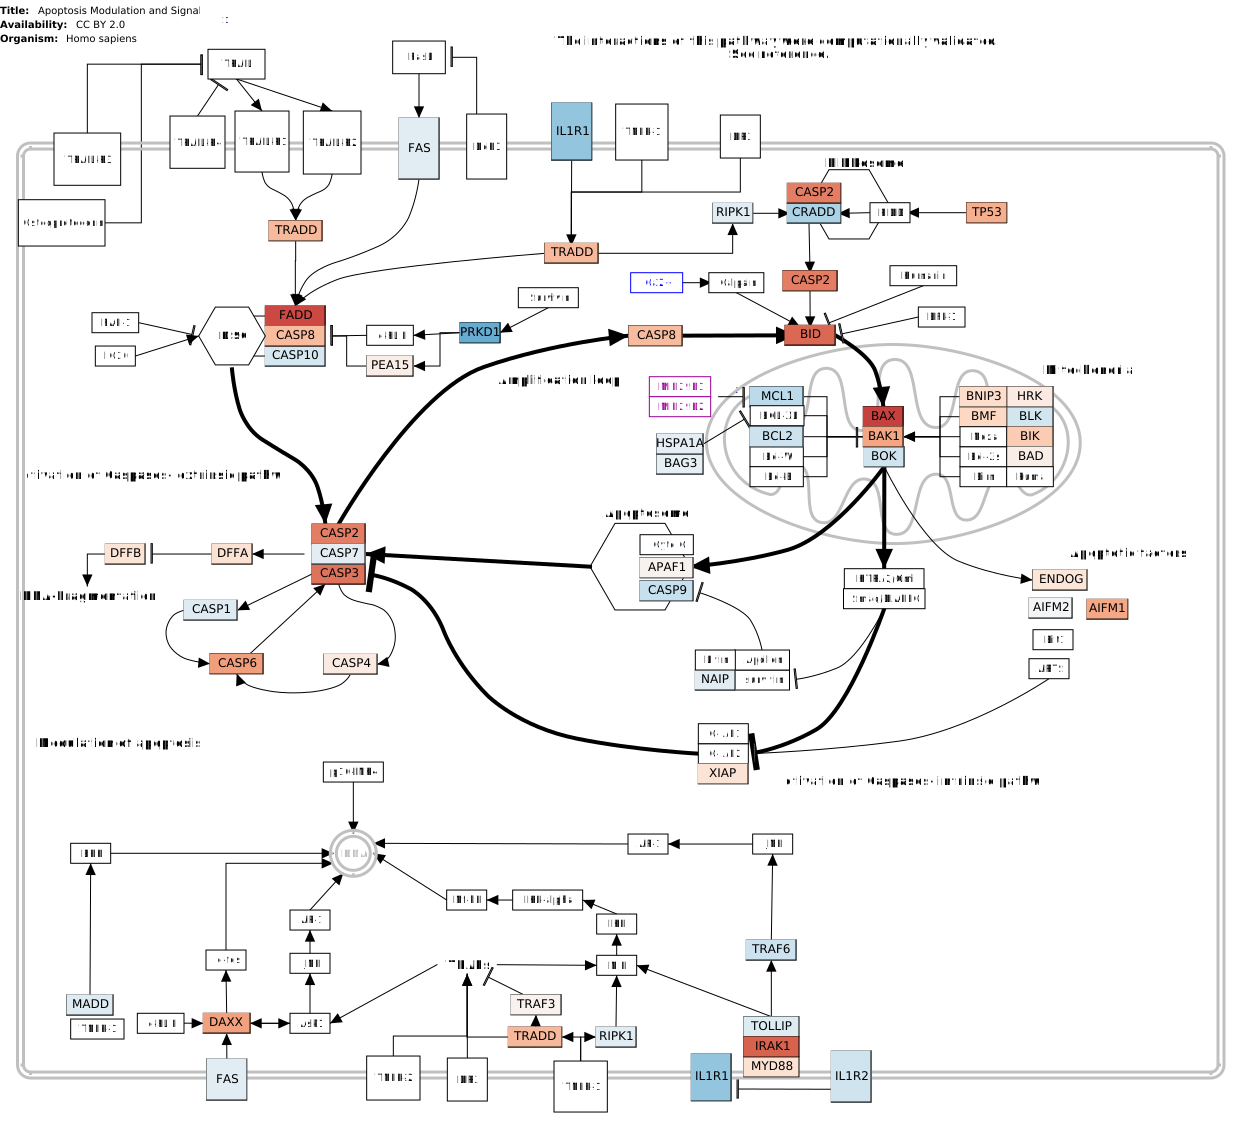

In [226]:
p = 'http://www.wikipathways.org//wpi/wpi.php?action=downloadFile&type=gpml&pwTitle=Pathway:WP1772&oldid=80459'
doc = lxml.etree.parse(p)
root = doc.getroot()
#ids = pd.DataFrame([[c.attrib['TextLabel'], c.attrib['GraphId']] for c in root.getchildren() 
#           if 'TextLabel' in c.attrib])
ids = pd.DataFrame([[get_gene(c), c.attrib['GraphId']] for c in root.getchildren() 
           if 'TextLabel' in c.attrib])
ids = ids.set_index(0)[1]
f = dx_rna.frac
pp = ids.ix[f.index].dropna()
gm = f.ix[pp.index]
cmap = gm.map(lambda v: rgb2hex(RdBu(1-v)).upper()[1:])

# Get colored pathway
kwargs = {
    'identifier': 'WP1772',
    'version': 0,
    'element_identifiers': list(pp),
    'colors': list(cmap),
    'file_format': 'html'
}
file = wikipathways_api_client_instance.get_colored_pathway(**kwargs)
SVG(file)